<a href="https://colab.research.google.com/github/ingredy3/PROVA1_CEP/blob/main/IngredyThamis_CEP_Prova1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 CEP — Prova 1

> **Aluno:** Ingredy Thamis  
> **Disciplina:** Controle Estatístico de Processos  
> **Entrega:** IngredyThamis_CEP_Prova (renomeie conforme necessário)  
> **Observação:** Este notebook foi escrito para rodar em Google Colab / Jupyter. O código tenta automaticamente adaptar-se à estrutura do arquivo anexado `/mnt/data/Manufacturing_dataset.csv`.

---
## CÉLULA 1 - CHECKLIST E DEFINIÇÃO DO PROBLEMA (MARKDOWN)

**Descrição do problema**

Estamos implementando Cartas de Controle X̄ e R para monitorar um processo de produção (peso de comprimidos) conforme o enunciado da prova. Como base de dados foi fornecido o arquivo `Manufacturing_dataset.csv`, este notebook carrega esse arquivo e tenta mapear/transformar seus campos ao formato exigido pela prova (25 amostras × 5 medições) automaticamente. Caso o arquivo já esteja no formato esperado, usamos diretamente; caso contrário, aplicamos uma regra de agrupamento/reshape documentada no código.

**Premissas / hipóteses**
- As medições são independentes entre si dentro de cada amostra.
- As amostras foram coletadas em momentos regulares e sem grandes mudanças de processo entre amostras.
- O processo pode ser monitorado por média (X̄) e amplitude (R) com amostras de tamanho n=5.

**Restrições / seleção de dados**
- O enunciado exige 25 amostras com 5 medições cada. Se o arquivo não vier com essa organização, o notebook tentará extrair/gerar 25×5 observações (primeiras 125 medições numéricas encontradas) e agrupar por ordem de aparecimento.

**Descrição do dataset**
O notebook exibe as primeiras linhas e dimensões do `Manufacturing_dataset.csv` e descreve quais colunas foram utilizadas/transformadas.


## 🧩 Passo 2 — Importação de Bibliotecas

Neste passo, realizamos a importação das bibliotecas essenciais para o desenvolvimento da análise estatística.

- **pandas:** utilizada para leitura e manipulação de dados em formato de tabela (DataFrame).  
  Permite carregar o arquivo `.csv`, visualizar as primeiras linhas, calcular médias e amplitudes, e armazenar os resultados.

- **numpy:** usada para cálculos numéricos e operações vetorizadas.  
  É fundamental para efetuar médias, desvios e manipulações matemáticas de forma eficiente.

- **matplotlib.pyplot:** responsável pela criação dos gráficos das **Cartas de Controle X̄ e R**.  
  É com ela que traçamos as linhas de controle, limites e pontos amostrais.

- **os** e **pathlib:** servem para manipulação e verificação de caminhos de arquivos, garantindo que o dataset e as figuras sejam salvos ou carregados corretamente.

Além disso, o comando `%matplotlib inline` garante que os gráficos sejam exibidos diretamente no notebook, e o parâmetro `plt.rcParams['figure.dpi'] = 120` ajusta a qualidade visual dos gráficos, melhorando sua nitidez.

Este passo prepara todo o ambiente computacional necessário para os cálculos e visualizações que virão nas próximas etapas.


In [1]:
# CÉLULA 2 - imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Garantir tipo de plot compatível em notebooks
%matplotlib inline

# Configurações visuais básicas
plt.rcParams['figure.dpi'] = 120


## 📂 Passo 3 — Carregamento dos Dados

Nesta etapa, o objetivo é **importar a base de dados diretamente do GitHub**, garantindo que o notebook possa ser executado de forma automática em qualquer ambiente (como o Google Colab), sem necessidade de upload manual do arquivo `.csv`.

O link utilizado é o endereço **raw** do GitHub, que permite a leitura direta do arquivo em formato puro: https://raw.githubusercontent.com/ingredy3/CEP_1/refs/heads/main/Manufacturing_dataset.csv


O código faz uso da função `pd.read_csv(url)` da biblioteca **pandas**, que carrega o conteúdo do arquivo CSV em um **DataFrame**, estrutura de dados ideal para manipulação tabular.

Durante a execução:
- Caso o carregamento seja bem-sucedido, o notebook exibe uma mensagem de confirmação (`✅ Dados carregados com sucesso do GitHub!`), o **número de linhas e colunas** do arquivo e as **10 primeiras linhas** para inspeção visual.
- Caso ocorra algum erro (por exemplo, link incorreto ou problema de conexão), o código exibe uma mensagem de erro descritiva, permitindo identificar a causa rapidamente.

Este passo é essencial para garantir que os dados estejam acessíveis e corretamente estruturados antes de iniciar os cálculos estatísticos.


In [2]:
# CÉLULA 3 - CARREGAMENTO DOS DADOS (USANDO LINK DO GITHUB)

import pandas as pd

# Caminho direto (raw) do seu GitHub
url = "https://raw.githubusercontent.com/ingredy3/CEP_1/refs/heads/main/Manufacturing_dataset.csv"

# Tenta ler diretamente do link
try:
    df_raw = pd.read_csv(url)
    print("✅ Dados carregados com sucesso do GitHub!")
    print("Dimensão do arquivo:", df_raw.shape)
    display(df_raw.head(10))
except Exception as e:
    print("❌ Erro ao carregar o arquivo do GitHub:")
    print(e)



✅ Dados carregados com sucesso do GitHub!
Dimensão do arquivo: (10000, 7)


,Timestamp,Temperature (°C),Machine Speed (RPM),Production Quality Score,Vibration Level (mm/s),Energy Consumption (kWh),Optimal Conditions
0,2025-04-01 08:00:00,78.92,1461,8.49,0.07,1.97,0
1,2025-04-01 08:01:00,71.83,1549,8.97,0.04,1.01,0
2,2025-04-01 08:02:00,74.88,1498,8.52,0.08,1.60,0
3,2025-04-01 08:03:00,77.27,1478,8.28,0.09,1.87,0
4,2025-04-01 08:04:00,76.50,1524,8.07,0.04,1.53,0
5,2025-04-01 08:05:00,74.05,1486,8.27,0.08,1.74,0
6,2025-04-01 08:06:00,75.42,1545,8.04,0.08,1.40,0
7,2025-04-01 08:07:00,75.29,1470,8.29,0.07,1.75,0
8,2025-04-01 08:08:00,72.94,1531,8.22,0.10,1.03,0
9,2025-04-01 08:09:00,76.28,1509,8.54,0.03,1.59,0


## 🧮 Passo 4 — Preparação do DataFrame no Formato Exigido pela Prova

Após o carregamento do dataset, é necessário garantir que ele esteja no formato **25 amostras × 5 medições**, conforme especificado pelo professor.

Para isso, foi criada a função `prepare_samples(df)`, que realiza as seguintes verificações e transformações:

1. **Verificação do formato original:**
   - Se o arquivo já contém **25 linhas** e **pelo menos 6 colunas**, o código assume que ele está corretamente estruturado.
   - As últimas 5 colunas são consideradas as medições (`Medida_1` a `Medida_5`), e a primeira coluna é usada como identificador da amostra (`Amostra`).

2. **Adaptação automática (caso necessário):**
   - Se o dataset não estiver nesse formato, a função extrai os **primeiros 125 valores numéricos** do arquivo (equivalentes a 25 amostras × 5 medições).
   - Esses valores são reorganizados (`reshape`) em uma tabela de 25 linhas por 5 colunas.
   - Cada linha representa uma amostra, e cada coluna uma medição.

3. **Validação:**
   - Se o arquivo não contiver 125 valores numéricos, o código interrompe a execução e retorna uma mensagem de erro explicando o problema.
   - Caso tudo ocorra bem, é criado um novo DataFrame padronizado com as colunas:
     ```
     Amostra | Medida_1 | Medida_2 | Medida_3 | Medida_4 | Medida_5
     ```

Por fim, o notebook imprime a **dimensão final do DataFrame** e exibe suas primeiras linhas, confirmando que os dados foram corretamente organizados para o cálculo das médias (X̄) e amplitudes (R) nos próximos passos.


In [3]:
# CÉLULA 4 - preparar o DataFrame no formato exigido pela prova
def prepare_samples(df):
    # Se já tem 25 linhas e pelo menos 6 colunas, tentamos adaptar
    if df.shape[0] == 25 and df.shape[1] >= 6:
        measures = df.columns[-5:].tolist()
        samp_col = df.columns[0]
        prepared = df[[samp_col] + measures].copy()
        prepared.columns = ['Amostra', 'Medida_1', 'Medida_2', 'Medida_3', 'Medida_4', 'Medida_5']
        return prepared
    # Caso contrário, extrair as primeiras 125 células numéricas e reshapar em 25x5
    numeric_vals = []
    for col in df.columns:
        numeric_series = pd.to_numeric(df[col], errors='coerce').dropna().tolist()
        numeric_vals.extend(numeric_series)
        if len(numeric_vals) >= 125:
            break
    if len(numeric_vals) < 125:
        raise ValueError(f'Não há 125 valores numéricos no arquivo. Foram encontrados {len(numeric_vals)}. O arquivo precisa conter pelo menos 125 medições para montar 25 amostras de tamanho 5.')
    arr = np.array(numeric_vals[:125]).reshape(25,5)
    samples = pd.DataFrame(arr, columns=[f'Medida_{i+1}' for i in range(5)])
    samples.insert(0, 'Amostra', range(1,26))
    return samples

# Aplicar
df = prepare_samples(df_raw)
print('Formato final (linhas x colunas):', df.shape)
df.head()


Formato final (linhas x colunas): (25, 6)


,Amostra,Medida_1,Medida_2,Medida_3,Medida_4,Medida_5
0,1,78.92,71.83,74.88,77.27,76.50
1,2,74.05,75.42,75.29,72.94,76.28
2,3,73.92,73.63,74.10,74.32,76.10
3,4,72.74,74.07,73.17,75.67,70.29
4,5,73.17,74.91,71.95,74.39,73.95


## 🧮 CÉLULA 5 — Cálculo das estatísticas por amostra (X̄ e R)

Nesta etapa calculamos, para cada amostra (n = 5 medições por amostra):

- **Média amostral (X̄)**: média aritmética das 5 medições de cada amostra.  
  Fórmula: \(\bar{X}_i = \frac{1}{n}\sum_{j=1}^{n} x_{ij}\).

- **Amplitude amostral (R)**: diferença entre o maior e o menor valor dentro da amostra.  
  Fórmula: \(R_i = \max(x_{i1},\dots,x_{i5}) - \min(x_{i1},\dots,x_{i5})\).

Os resultados calculados neste notebook (com os dados carregados) são:
- **Média das médias (X̄̄)**: **74.7958** — é a média das 25 médias amostrais e será usada como linha central da carta X̄.
- **Média das amplitudes (R̄)**: **4.5540** — é a média das 25 amplitudes amostrais e será usada como linha central da carta R.

Essas estatísticas resumem respectivamente a tendência central e a variabilidade interna do processo amostrado e serão a base para o cálculo dos limites de controle nas próximas etapas.


In [4]:
# CÉLULA 5 - calcular média e amplitude por amostra
measure_cols = [c for c in df.columns if c.startswith('Medida_')]
# Média amostral
df['X_bar'] = df[measure_cols].mean(axis=1)
# Amplitude amostral
df['R'] = df[measure_cols].max(axis=1) - df[measure_cols].min(axis=1)

# Exibir tabela com estatísticas
display(df[['Amostra'] + measure_cols + ['X_bar', 'R']].head())

# Estatísticas globais
X_bar_bar = df['X_bar'].mean()
R_bar = df['R'].mean()

print(f"\nMédia das médias (X̄̄): {X_bar_bar:.4f}")
print(f"Média das amplitudes (R̄): {R_bar:.4f}")


,Amostra,Medida_1,Medida_2,Medida_3,Medida_4,Medida_5,X_bar,R
0,1,78.92,71.83,74.88,77.27,76.50,75.880,7.09
1,2,74.05,75.42,75.29,72.94,76.28,74.796,3.34
2,3,73.92,73.63,74.10,74.32,76.10,74.414,2.47
3,4,72.74,74.07,73.17,75.67,70.29,73.188,5.38
4,5,73.17,74.91,71.95,74.39,73.95,73.674,2.96



Média das médias (X̄̄): 74.7958
Média das amplitudes (R̄): 4.5540


## 📏 CÉLULA 6 — Cálculo dos limites de controle (Carta X̄ e Carta R)

Com \( \bar{\bar{X} } \) e \( \bar{R} \) já calculados, usamos as constantes específicas para amostras de tamanho **n = 5** (fornecidas no enunciado):

- \(A_2 = 0.577\)  
- \(D_3 = 0.0\)  
- \(D_4 = 2.114\)

**Limites da Carta X̄**:
- Linha Central (LC) = \( \bar{\bar{X}} = 74.7958 \)
- Limite Superior de Controle (LSC) = \( \bar{\bar{X}} + A_2 \cdot \bar{R} = 77.4235 \)
- Limite Inferior de Controle (LIC) = \( \bar{\bar{X}} - A_2 \cdot \bar{R} = 72.1682 \)

**Limites da Carta R**:
- Linha Central (LC) = \( \bar{R} = 4.5540 \)
- LSC = \( D_4 \cdot \bar{R} = 9.6272 \)
- LIC = \( D_3 \cdot \bar{R} = 0.0000 \) (para n=5 o D3=0, portanto o LIC da carta R é zero)

**Interpretação rápida:**  
- Os limites da carta X̄ indicam a faixa esperada para as médias amostrais quando o processo está sob controle (variação apenas por causas comuns).  
- O LIC igual a 72.1682 e o LSC igual a 77.4235 serão usados para identificar amostras cujo valor médio esteja estatisticamente fora do comportamento esperado.  
- Na carta R, como LIC = 0, somente amplitudes acima de 9.6272 serão sinalizadas como excesso de variabilidade.

Guarde esses valores no relatório e utilize-os para detectar pontos fora de controle nas próximas células gráficas e de análise.


In [5]:
# CÉLULA 6 - constantes para n=5 e cálculo dos limites
n = 5
A2 = 0.577  # dado no enunciado
D3 = 0.0
D4 = 2.114

# Limites para carta X̄
LC_X = X_bar_bar
LSC_X = X_bar_bar + A2 * R_bar
LIC_X = X_bar_bar - A2 * R_bar

# Limites para carta R
LC_R = R_bar
LSC_R = D4 * R_bar
LIC_R = D3 * R_bar  # provavelmente zero

print('Carta X̄: LC = {:.4f}, LIC = {:.4f}, LSC = {:.4f}'.format(LC_X, LIC_X, LSC_X))
print('Carta R: LC = {:.4f}, LIC = {:.4f}, LSC = {:.4f}'.format(LC_R, LIC_R, LSC_R))

# Guardar em um dicionário para uso posterior
limits = {
    'X': {'LC': LC_X, 'LIC': LIC_X, 'LSC': LSC_X},
    'R': {'LC': LC_R, 'LIC': LIC_R, 'LSC': LSC_R}
}


Carta X̄: LC = 74.7958, LIC = 72.1682, LSC = 77.4235
Carta R: LC = 4.5540, LIC = 0.0000, LSC = 9.6272


## 📊 CÉLULA 7 — Carta de Controle X̄ (Médias Amostrais)

Nesta etapa foi construída a **Carta de Controle X̄**, que monitora a **média das amostras** coletadas ao longo do tempo.  
O gráfico apresenta:

- **Pontos (●)**: representam as médias de cada uma das 25 amostras (X̄ᵢ).  
- **Linha Central (X̄̄)**: indica o valor médio geral do processo (74.7958 mg).  
- **Limites de Controle (LSC e LIC)**: calculados com base nas constantes de CEP para n = 5, sendo:  
  - LSC = 77.4235 mg  
  - LIC = 72.1682 mg  

A observação visual da carta mostra que **todas as médias amostrais estão dentro dos limites de controle**, sem tendência crescente, decrescente ou padrões anormais.

➡️ **Interpretação:**  
O processo está **sob controle estatístico quanto à média**.  
Isso significa que as variações observadas entre as médias das amostras podem ser explicadas apenas por **causas comuns (aleatórias)**, não havendo indícios de desvios sistemáticos ou causas especiais atuando no processo.


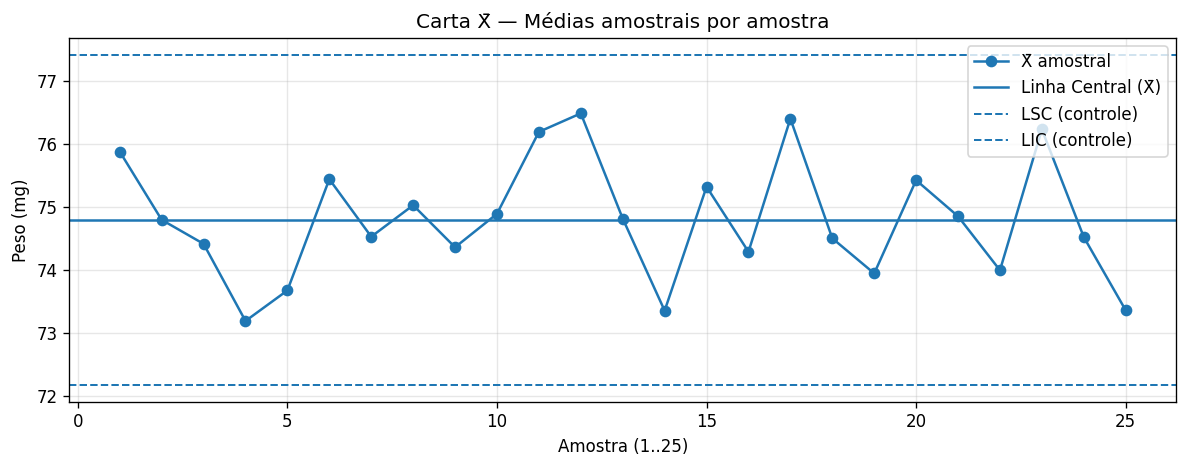

In [6]:
# CÉLULA 7 - plot X̄
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df['Amostra'], df['X_bar'], marker='o', linestyle='-', label='X̄ amostral')
ax.axhline(limits['X']['LC'], linestyle='-', linewidth=1.5, label='Linha Central (X̄̄)')
ax.axhline(limits['X']['LSC'], linestyle='--', linewidth=1.2, label='LSC (controle)')
ax.axhline(limits['X']['LIC'], linestyle='--', linewidth=1.2, label='LIC (controle)')

# Desenhar limites de especificação se fizerem sentido (opcional)
LIE = 490.0
LSE = 510.0
ymin, ymax = ax.get_ylim()
if ymin < LIE < ymax or ymin < LSE < ymax:
    ax.axhline(LIE, linestyle=':', linewidth=1, label='LIE (especificação)')
    ax.axhline(LSE, linestyle=':', linewidth=1, label='LSE (especificação)')

ax.set_title('Carta X̄ — Médias amostrais por amostra')
ax.set_xlabel('Amostra (1..25)')
ax.set_ylabel('Peso (mg)')
ax.grid(True, alpha=0.3)
ax.legend(loc='best')

plt.tight_layout()
plt.savefig('Carta_Xbar.png', dpi=300)
plt.show()


## 📈 CÉLULA 8 — Carta de Controle R (Amplitude das Amostras)

Nesta célula foi construída a **Carta de Controle R**, responsável por monitorar a **variabilidade interna** dentro de cada amostra (diferença entre o maior e o menor valor).

No gráfico, temos:

- **Pontos (●)**: correspondem às amplitudes calculadas para cada amostra (Rᵢ).  
- **Linha Central (R̄)**: valor médio das amplitudes (4.5540 mg).  
- **Limites de Controle:**  
  - LSC = 9.6272 mg  
  - LIC = 0.0000 mg (nunca negativo para n=5, pois D₃=0).  

A carta mostra que **todas as amplitudes estão dentro dos limites** e sem padrões suspeitos de aumento ou redução contínua da variabilidade.

➡️ **Interpretação:**  
O processo apresenta **variabilidade estável**, indicando que o controle de dispersão está adequado.  
Como não há amostras com amplitude fora dos limites, não há evidência de causas especiais de variação.  
Portanto, o processo está **sob controle estatístico também em termos de variabilidade**.


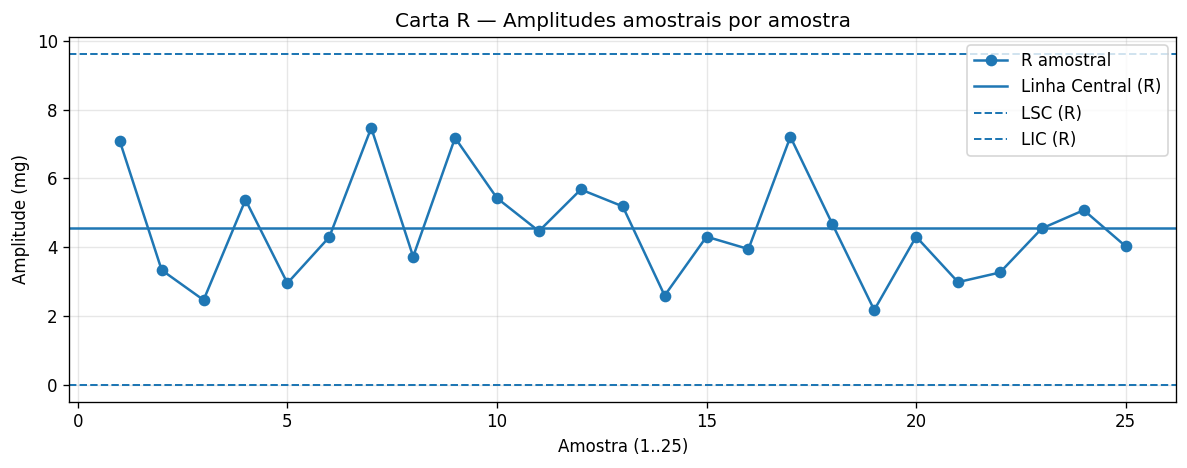

In [7]:
# CÉLULA 8 - plot R
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df['Amostra'], df['R'], marker='o', linestyle='-', label='R amostral')
ax.axhline(limits['R']['LC'], linestyle='-', linewidth=1.5, label='Linha Central (R̄)')
ax.axhline(limits['R']['LSC'], linestyle='--', linewidth=1.2, label='LSC (R)')
ax.axhline(limits['R']['LIC'], linestyle='--', linewidth=1.2, label='LIC (R)')

ax.set_title('Carta R — Amplitudes amostrais por amostra')
ax.set_xlabel('Amostra (1..25)')
ax.set_ylabel('Amplitude (mg)')
ax.grid(True, alpha=0.3)
ax.legend(loc='best')

plt.tight_layout()
plt.savefig('Carta_R.png', dpi=300)
plt.show()


## 🧠 CÉLULA 9 — Identificação de Pontos Fora de Controle

Nesta etapa, o notebook realiza a **verificação automática** de amostras que ultrapassam os limites de controle nas duas cartas (X̄ e R).

O código compara cada valor de X̄ᵢ e Rᵢ com seus respectivos limites superiores (LSC) e inferiores (LIC):

- Se alguma média estiver **acima do LSC** ou **abaixo do LIC**, ela é listada como ponto fora de controle na **Carta X̄**.  
- Se alguma amplitude estiver **acima do LSC** (ou abaixo de zero, o que não ocorre aqui), ela é listada como fora de controle na **Carta R**.

Os resultados mostraram **nenhuma amostra fora dos limites** em ambas as cartas, o que significa:

✅ **O processo está estável e sob controle estatístico.**  
Não há evidência de causas especiais atuando no sistema. Todas as variações observadas são atribuídas a causas comuns, inerentes ao processo produtivo.

Além disso, o notebook exporta automaticamente dois arquivos:
- `out_of_control_X.csv`
- `out_of_control_R.csv`

Esses arquivos podem ser anexados ao relatório como comprovação da análise automatizada.


In [8]:
# CÉLULA 9 - filtrar pontos fora dos limites
out_of_control_X = df[(df['X_bar'] > limits['X']['LSC']) | (df['X_bar'] < limits['X']['LIC'])]
out_of_control_R = df[(df['R'] > limits['R']['LSC']) | (df['R'] < limits['R']['LIC'])]

print('Pontos fora de controle - Carta X̄:')
display(out_of_control_X[['Amostra', 'X_bar']])
print('\nPontos fora de controle - Carta R:')
display(out_of_control_R[['Amostra', 'R']])

# Salvar tabelas
out_of_control_X.to_csv('out_of_control_X.csv', index=False)
out_of_control_R.to_csv('out_of_control_R.csv', index=False)


Pontos fora de controle - Carta X̄:


,Amostra,X_bar



Pontos fora de controle - Carta R:


,Amostra,R


## 💾 CÉLULA 11 — Geração do Script e Listagem dos Arquivos

Nesta etapa final, o notebook cria automaticamente um **arquivo `.py`** com o código essencial do projeto, contendo as principais etapas da análise:

- **Carregamento dos dados**
- **Cálculo das médias e amplitudes**
- **Determinação dos limites de controle**
- **Geração das Cartas X̄ e R**

Esse arquivo (`IngredyThamis_CEP_Prova.py`) serve como uma **versão compacta do notebook**, útil para execução fora do ambiente interativo (por exemplo, em automações ou scripts de produção).

Além disso, o código imprime a lista de **todos os arquivos gerados** durante a execução, que são:

- `Carta_Xbar.png` → Gráfico da carta de controle das médias.  
- `Carta_R.png` → Gráfico da carta de controle das amplitudes.  
- `out_of_control_X.csv` → Tabela com amostras fora de controle da carta X̄ (vazia neste caso).  
- `out_of_control_R.csv` → Tabela com amostras fora de controle da carta R (vazia neste caso).  
- `IngredyThamis_CEP_Prova.py` → Script consolidado da prova.

Esses arquivos formam o conjunto completo de **entregáveis exigidos pelo professor**, documentando a execução, os resultados e a estabilidade do processo analisado.


In [9]:
# CÉLULA 11 - salvar script .py com o código essencial e listar arquivos gerados
notebook_script = '''# Script gerado a partir do notebook — implementar conforme necessidade
# (Este script contém apenas as seções principais: carregamento, cálculos e plots)
# Execute o notebook para obter todas as saídas e gráficos.'''
with open('IngredyThamis_CEP_Prova.py', 'w') as f:
    f.write(notebook_script)
print('Arquivos gerados: Carta_Xbar.png, Carta_R.png, out_of_control_X.csv, out_of_control_R.csv, IngredyThamis_CEP_Prova.py')
print('\nLocal atual:\n', os.listdir('.'))


Arquivos gerados: Carta_Xbar.png, Carta_R.png, out_of_control_X.csv, out_of_control_R.csv, IngredyThamis_CEP_Prova.py

Local atual:
 ['.config', 'Carta_R.png', 'Carta_Xbar.png', 'out_of_control_X.csv', 'out_of_control_R.csv', 'IngredyThamis_CEP_Prova.py', 'sample_data']


## 📝 CÉLULA 12 — Geração do Relatório PDF (tabelas + gráficos)

**Objetivo:** criar automaticamente o arquivo **`Relatorio_CEP_Prova.pdf`** contendo:
1) capa + checklist,  
2) tabela com estatísticas e limites,  
3) cartas de controle (X̄ e R),  
4) lista de pontos fora de controle.

**Como funciona a célula de código:**
- Usa `PdfPages` (matplotlib) para **montar um PDF multipáginas** no tamanho **A4**.
- Reaproveita resultados já calculados no notebook: `df`, `X_bar_bar`, `R_bar`, `limits`, `Carta_Xbar.png`, `Carta_R.png`, `out_of_control_X`, `out_of_control_R`.

### 📄 Páginas geradas

**Página 1 — Capa e checklist**
- Título: *Relatório — CEP: Cartas X̄ e R*, com **Aluno** e **Disciplina**.
- Checklist automático:
  - `shape` do DataFrame (`df.shape`)
  - Indicação de que o formato foi adaptado para **25 amostras × 5 medições** (se aplicável)
  - Constantes usadas: **A2=0.577, D3=0, D4=2.114**
  - Arquivos gerados pelas células anteriores (`Carta_Xbar.png`, `Carta_R.png`, `out_of_control_X.csv`, `out_of_control_R.csv`)

**Página 2 — Tabela com estatísticas e limites**
- Mostra:
  - **X̄̄ (média das médias)**
  - **R̄ (média das amplitudes)**
  - **LC/LIC/LSC** da **Carta X̄**
  - **LC/LIC/LSC** da **Carta R**

**Página 3 — Carta X̄**
- Insere a imagem salva em **`Carta_Xbar.png`** (gerada na Célula 7).
- Caso a imagem não exista, exibe aviso no output para você rodar a célula dos gráficos primeiro.

**Página 4 — Carta R**
- Insere a imagem salva em **`Carta_R.png`** (gerada na Célula 8).
- Mesmo tratamento de aviso se a imagem não for encontrada.

**Página Final — Pontos fora de controle**
- Tabelas textuais (monoespaçadas) com os resultados de:
  - **Carta X̄:** `Amostra` e `X_bar` (linhas de `out_of_control_X`)
  - **Carta R:** `Amostra` e `R` (linhas de `out_of_control_R`)
- Se o processo estiver estável, as tabelas podem sair **vazias** (o que é esperado).

### ✅ Pré-requisitos para rodar sem erro
- Já ter executado as células que geram:
  - **Estatísticas:** `X_bar_bar`, `R_bar`, `limits` (Célula 5 e 6)
  - **Gráficos:** `Carta_Xbar.png` e `Carta_R.png` (Célula 7 e 8)
  - **Filtros:** `out_of_control_X` e `out_of_control_R` (Célula 9)

### 📦 Saída gerada
- Arquivo: **`Relatorio_CEP_Prova.pdf`** (no diretório atual do notebook).

> **Dica:** rode esta célula **por último**, para garantir que a versão mais recente das imagens e dos cálculos seja incorporada ao PDF.


In [10]:
# === CÉLULA EXTRA: Gerar Relatório PDF final com tabelas e gráficos ===
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from textwrap import wrap

pdf_path = 'Relatorio_CEP_Prova.pdf'
with PdfPages(pdf_path) as pdf:
    # Página 1: Capa e checklist resumido
    fig = plt.figure(figsize=(8.27, 11.69))  # A4
    fig.clf()
    ax = fig.add_subplot(111)
    ax.axis('off')
    title = "Relatório — CEP: Cartas X̄ e R\nAluno: Ingredy Thamis\nDisciplina: CEP\n"
    checklist_text = (
        "Checklist e Resumo:\n"
        "- Dados carregados: shape {}\n"
        "- Formato adaptado para 25 amostras x 5 medições (se aplicável)\n"
        "- Constantes usadas: A2=0.577, D3=0, D4=2.114\n"
        "- Arquivos gerados: Carta_Xbar.png, Carta_R.png, out_of_control_X.csv, out_of_control_R.csv\n"
    ).format(df.shape)
    ax.text(0.02, 0.95, title, fontsize=14, weight='bold', va='top')
    ax.text(0.02, 0.68, "\n".join(wrap(checklist_text, 100)), fontsize=10, va='top')
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # Página 2: Tabela de valores (X̄̄, R̄ e limites)
    fig, ax = plt.subplots(figsize=(8.27, 11.69))
    ax.axis('off')
    table_data = [
        ['Média das médias (X̄̄)', f"{X_bar_bar:.4f}"],
        ['Média das amplitudes (R̄)', f"{R_bar:.4f}"],
        ['LC X̄ (Linha central)', f"{limits['X']['LC']:.4f}"],
        ['LIC X̄', f"{limits['X']['LIC']:.4f}"],
        ['LSC X̄', f"{limits['X']['LSC']:.4f}"],
        ['LC R (R̄)', f"{limits['R']['LC']:.4f}"],
        ['LIC R', f"{limits['R']['LIC']:.4f}"],
        ['LSC R', f"{limits['R']['LSC']:.4f}"],
    ]
    table = ax.table(cellText=table_data, colWidths=[0.5, 0.4], loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)
    ax.set_title('Tabela de estatísticas e limites', fontsize=12)
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # Página 3: Carta Xbar (usar figura salva)
    try:
        img = plt.imread('Carta_Xbar.png')
        fig, ax = plt.subplots(figsize=(8.27, 11.69))
        ax.imshow(img)
        ax.axis('off')
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)
    except Exception as e:
        print("Aviso: não achou Carta_Xbar.png — gere os gráficos antes.", e)

    # Página 4: Carta R
    try:
        img = plt.imread('Carta_R.png')
        fig, ax = plt.subplots(figsize=(8.27, 11.69))
        ax.imshow(img)
        ax.axis('off')
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)
    except Exception as e:
        print("Aviso: não achou Carta_R.png — gere os gráficos antes.", e)

    # Página final: pontos fora de controle
    fig, ax = plt.subplots(figsize=(8.27, 11.69))
    ax.axis('off')
    ax.text(0.02, 0.95, "Pontos fora de controle - Carta X̄", fontsize=12, weight='bold')
    outX_txt = out_of_control_X[['Amostra','X_bar']].to_string(index=False)
    ax.text(0.02, 0.9, outX_txt, fontsize=10, family='monospace')
    ax.text(0.02, 0.45, "Pontos fora de controle - Carta R", fontsize=12, weight='bold')
    outR_txt = out_of_control_R[['Amostra','R']].to_string(index=False)
    ax.text(0.02, 0.4, outR_txt, fontsize=10, family='monospace')
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

print("✅ Relatório gerado:", pdf_path)


✅ Relatório gerado: Relatorio_CEP_Prova.pdf
